In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\4293658283.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Cargar el archivo NPY
intervals = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_1601.npy')
intervals_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_ref_1601.npy')
labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_1601.npy')
labels_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_ref_1601.npy')
test_intervals_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_intervals_1601.npy')
test_labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_labels_1601.npy')
x_out_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_1601.npy')
x_out_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_ref_1601.npy')
x_out_1601_test = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_test_1601.npy')

In [3]:
print('intervals:', intervals.shape)
print('intervals_ref:', intervals_ref.shape)
print('labels_1601:', labels_1601.shape)
print('labels_1601_ref:', labels_1601_ref.shape)
print('test_intervals_1601:', test_intervals_1601.shape)
print('test_labels_1601:', test_labels_1601.shape)
print('x_out_1601:', x_out_1601.shape)
print('x_out_1601_ref:', x_out_1601_ref.shape)
print('x_out_1601_test:', x_out_1601_test.shape)


intervals: (4800,)
intervals_ref: (80,)
labels_1601: (4800,)
labels_1601_ref: (80,)
test_intervals_1601: (2400,)
test_labels_1601: (2400,)
x_out_1601: (4800, 1601, 128, 1)
x_out_1601_ref: (80, 1601, 128, 1)
x_out_1601_test: (2400, 1601, 128, 1)


In [4]:
def filter_cwt(X, thr):
    X_copy = X.copy()
    X_copy[X_copy < thr] = 0
    return X_copy

thr = 0.1
x_out_1601 = filter_cwt(x_out_1601, thr)
x_out_1601_test = filter_cwt(x_out_1601_test, thr)

In [5]:
import pandas as pd
import numpy as np

# Crear un DataFrame
df = pd.DataFrame({
    'intervals': intervals,   # Asumimos que 'intervals' está previamente cargado
    'labels_1601': labels_1601  # Asumimos que 'labels_1601' está previamente cargado
})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\3632705751.py:11: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\3632705751.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [6]:
df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\2544489754.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]


In [7]:
import pandas as pd
import numpy as np

# Crear un DataFrame
df_2 = pd.DataFrame({
    'test_intervals_1601': test_intervals_1601,
    'test_labels_1601': test_labels_1601
})

# Combinar 'test_intervals_1601' y 'test_labels_1601' en una columna y factorizar para asignar un identificador único
df_2['category'] = pd.factorize(list(zip(df_2['test_intervals_1601'], df_2['test_labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category_y = df_2.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted_y = [sorted(positions, reverse=True) for positions in positions_by_category_y]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
y_test_a_position = np.array(positions_by_category_y, dtype=object)
y_test_b_position = np.array(positions_by_category_sorted_y, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_y_test_a_position = [item for sublist in y_test_a_position for item in sublist]
indices_y_test_b_position = [item for sublist in y_test_b_position for item in sublist]

# Descomentar si necesitas imprimir las posiciones
# print("Array de posiciones por categoría:")
# for idx, positions in enumerate(y_test_a_position):
#     print(f"Categoría {idx}: {positions}")

# print("Array de posiciones ordenadas por categoría:")
# for idx, positions in enumerate(y_test_b_position):
#     print(f"Categoría {idx}: {positions}")


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\1458930804.py:11: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df_2['category'] = pd.factorize(list(zip(df_2['test_intervals_1601'], df_2['test_labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_9828\1458930804.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category_y = df_2.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

def build_autoencoder():
    # Define la entrada con el nuevo tamaño de imagen
    input_img = Input(shape=(1600, 128, 1))

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Construir el modelo
autoencoder = build_autoencoder()
autoencoder.summary()



c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1600, 128, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 1600, 128, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1600, 128, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1600, 128, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 800, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 800, 64, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 400, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 400, 32, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 200, 16, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 400, 32, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 800, 64, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 800, 64, 64)    │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 1600, 128, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 334,593 (1.28 MB)

 Trainable params: 333,697 (1.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [9]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_1601[indices_x_train_a_position]
x_train_b = x_out_1601[indices_x_train_b_position]
x_test = x_out_1601_test[indices_y_test_a_position]
x_test_b = x_out_1601_test[indices_y_test_b_position]

# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

In [10]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_train_b:", x_train_b.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de x_test_b:", x_test_b.shape)

# Normalizar los datos de entrenamiento y prueba
x_train = x_train.astype('float32') / 255.0
x_train_b = x_train_b.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

Dimensiones de x_train: (4800, 1600, 128, 1)
Dimensiones de x_train_b: (4800, 1600, 128, 1)
Dimensiones de x_test: (2400, 1600, 128, 1)
Dimensiones de x_test_b: (2400, 1600, 128, 1)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0638 
Epoch 1: val_loss improved from inf to 0.03451, saving model to autoencoder_filtred_train.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2437s 16s/step - loss: 0.0637 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0291 
Epoch 2: val_loss improved from 0.03451 to 0.03276, saving model to autoencoder_filtred_train.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2375s 16s/step - loss: 0.0291 - val_loss: 0.0328 - learning_rate: 0.0010
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - loss: 0.0306 
Epoch 3: val_loss improved from 0.03276 to 0.02116, saving model to autoencoder_filtred_train.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2346s 16s/step - loss: 0.0306 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0285 
Epoch 4: val_loss improved from 0.02116 to 0.01872, saving model to autoencoder_filtred_train.keras
150/150 ━━━━━━━━━━━━━━━━━━

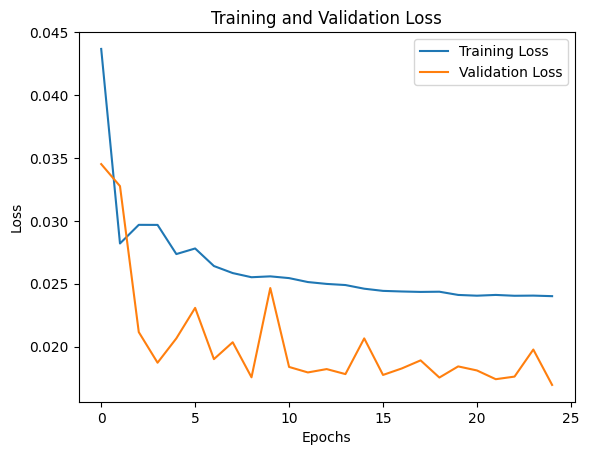

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model


# Configuración del entrenamiento del autoencoder
callbacks = [
    ModelCheckpoint('autoencoder_filtred_train.keras', verbose=1, save_best_only=True, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_train,
    y=x_train_b,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test_b),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


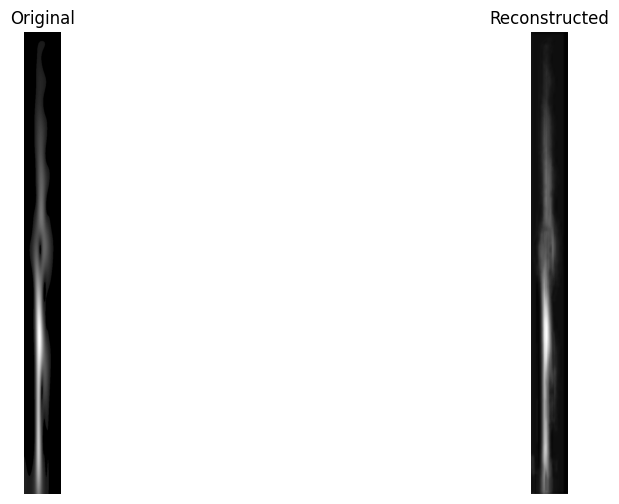

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the pretrained model (HDF5 file)
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_filtred_train.keras"

# Path to the input image
image_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/Medidas_en_2D/train/image_1.png"

# Function to load and prepare the image
def prepare_image(img_path):
    # Check if the file exists
    if not os.path.exists(img_path):
        print(f"The file {img_path} does not exist.")
        return None

    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image from {img_path}.")
        return None

    # Resize image to match the model's expected input dimensions
    img = cv2.resize(img, (128, 1600))  # Ensure the dimensions are correct
    img = np.array(img).astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension
    img = np.expand_dims(img, axis=0)  # Add a batch dimension for prediction
    return img

# Prepare the image
input_image = prepare_image(image_path)

# Load the trained autoencoder model
autoencoder = load_model(model_path)

if input_image is not None:
    # Perform prediction
    decoded_image = autoencoder.predict(input_image)

    # Display the original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image[0].reshape(1600, 128), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(decoded_image[0].reshape(1600, 128), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()
else:
    print("The image could not be prepared, and no prediction was performed.")


x_out_1601 shape: (4800, 1601, 128, 1)
labels_1601 shape: (4800,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


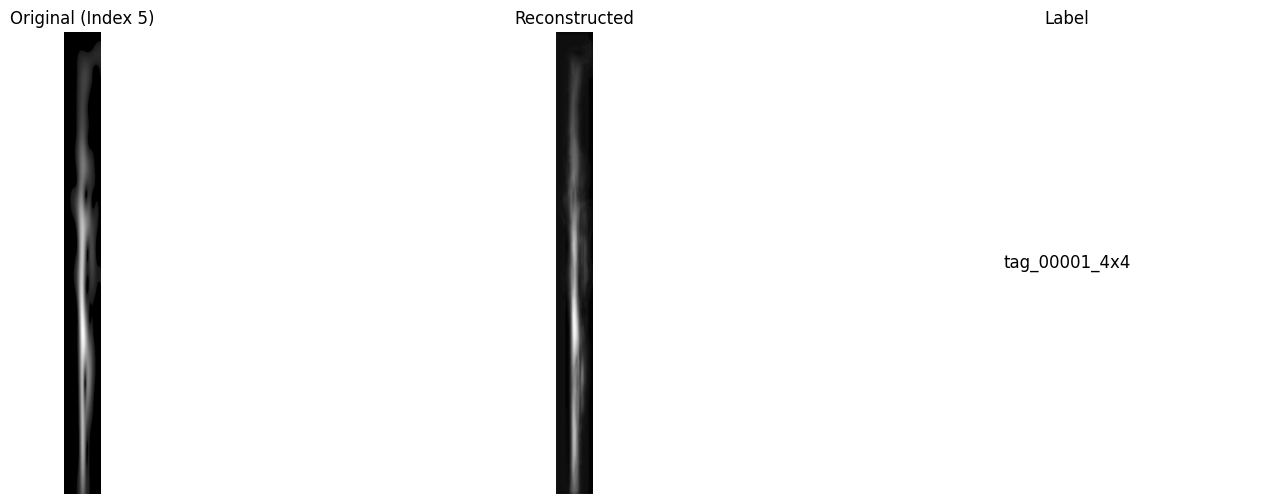

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the pretrained model (HDF5 file)
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_filtred_train.keras"

# Function to prepare the image for model input
def prepare_image(image):
    image = image.astype('float32') / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add a batch dimension for prediction
    return image

# Load the trained autoencoder model
autoencoder = load_model(model_path)

# Check the dimensions of the arrays
print(f"x_out_1601 shape: {x_out_1601.shape}")
print(f"labels_1601 shape: {labels_1601.shape}")

# Ensure x_out_1601 has the correct shape
x_out_1601 = x_out_1601[:, :1600, :, :]

# Select the index of the image to be reconstructed
index = 5  # Change this index to the desired image index

# Extract the specific image and label based on the index
original_image = x_out_1601[index]
label = labels_1601[index]

# Prepare the image for prediction
input_image = prepare_image(original_image)

# Perform prediction
decoded_image = autoencoder.predict(input_image)

# Display the original image, reconstructed image, and label
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image.squeeze(), cmap='gray')
plt.title(f"Original (Index {index})")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(decoded_image[0].squeeze(), cmap='gray')
plt.title("Reconstructed")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, str(label), horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.title("Label")
plt.axis('off')

plt.show()

In [23]:
import numpy as np
import keras
from keras.models import load_model

x_out_1601_test = x_out_1601_test[:, 1:1601, :, :]

x_train_autec = x_out_1601.astype('float32') / 255.0
x_test_autec = x_out_1601_test.astype('float32') / 255.0

# Cargar el modelo
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks/autoencoder_filtred_train.keras"
model = load_model(model_path)

# Predecir usando el modelo cargado
predictions_train = model.predict(x_train_autec)
predictions_test = model.predict(x_test_autec)


150/150 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step


In [24]:
predictions_train.shape,  x_out_1601_test.shape

((4800, 1600, 128, 1), (2400, 1600, 128, 1))

In [25]:
import tensorflow as tf
from functools import partial
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_1601)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.0776 - loss: 2.7741 - val_accuracy: 0.2575 - val_loss: 2.6727
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.1653 - loss: 2.6425 - val_accuracy: 0.4475 - val_loss: 2.3368
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.3259 - loss: 2.2309 - val_accuracy: 0.6933 - val_loss: 1.4679
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.4854 - loss: 1.5838 - val_accuracy: 0.7333 - val_loss: 1.0456
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.6076 - loss: 1.1752 - val_accuracy: 0.7925 - val_loss: 0.8659
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.6738 - loss: 0.9772 - val_accuracy: 0.8150 - val_loss: 0.7999
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.7327 - loss: 0.8362 - val_accuracy: 0.7896 - val_loss: 0.8155
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7512 -

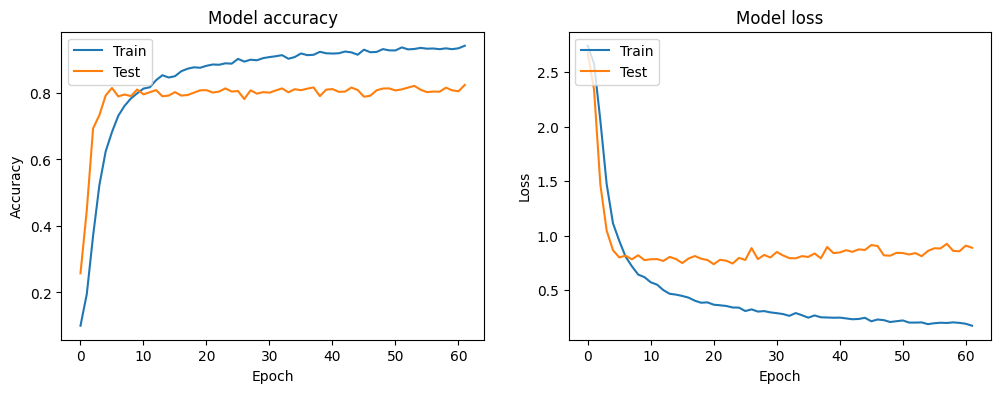

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


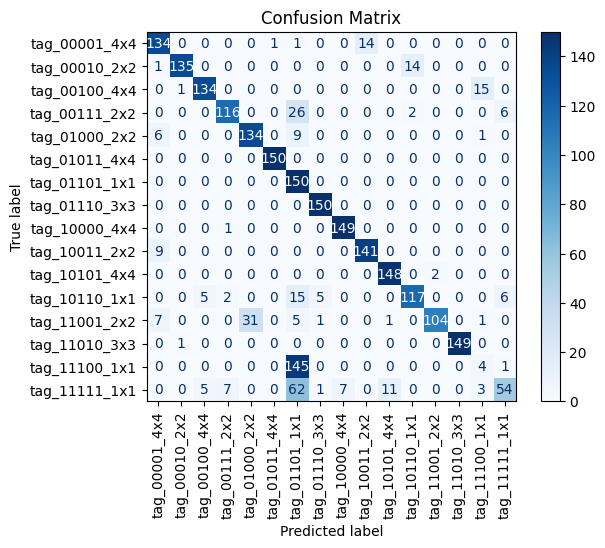

Exactitud del modelo: 82.04%
Tasa de errores: 17.96%


In [26]:

# Train the model
history = model.fit(predictions_train, labels_1601_categorical, epochs=100, validation_data=(predictions_test, labels_1601_categorical_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(x_test_autec)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")